In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,recall_score,precision_score,f1_score


2023-12-25 11:35:10.666029: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-25 11:35:10.928185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 11:35:10.928225: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 11:35:10.969640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-25 11:35:11.053420: I tensorflow/core/platform/cpu_feature_guar

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2023-12-25 11:35:13.611923: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 11:35:13.753545: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 11:35:13.753589: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
code={'س':0,'و':1,'ظ':2,'ط':3,'غ':4,'ف':5,'ا':6,'٣':7,'ض':8,'ث':9,'ذ':10,'٩':11,'ق':12,'١':13,'ش':14,'٤':15,'ص':16,'ب':17,'٥':18,'ت':19,'لا':20,'٠':21,'ي':22,'ج':23,'ح':24,'خ':25,'٧':26,'ز':27,'٨':28,'ه':29,'د':30,'٢':31,'ك':32,'م':33,'ر':34,'ل':35,'ن':36,'٦':37,'ع':38 }

def getname(n):
    for k,v in code.items():
        if v==n:
            return k

In [4]:
code.get('ل')

35

In [5]:
getname(5)

'ف'

In [6]:
data=[]
data_y=[]

In [7]:
train_path='./Dataset/'
for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path  + folder +'/*.png'))
    print(folder)
    for img in images:
        img=cv2.imread(img,0)
        img=cv2.resize(img,(100,100))
        data.append(img)
        data_y.append(code[folder])

ا
ب
ت
ث
ج
ح
خ
د
ذ
ر
ز
س
ش
ص
ض
ط
ظ
ع
غ
ف
ق
ك
ل
لا
م
ن
ه
و
ي
٠
١
٢
٣
٤
٥
٦
٧
٨
٩


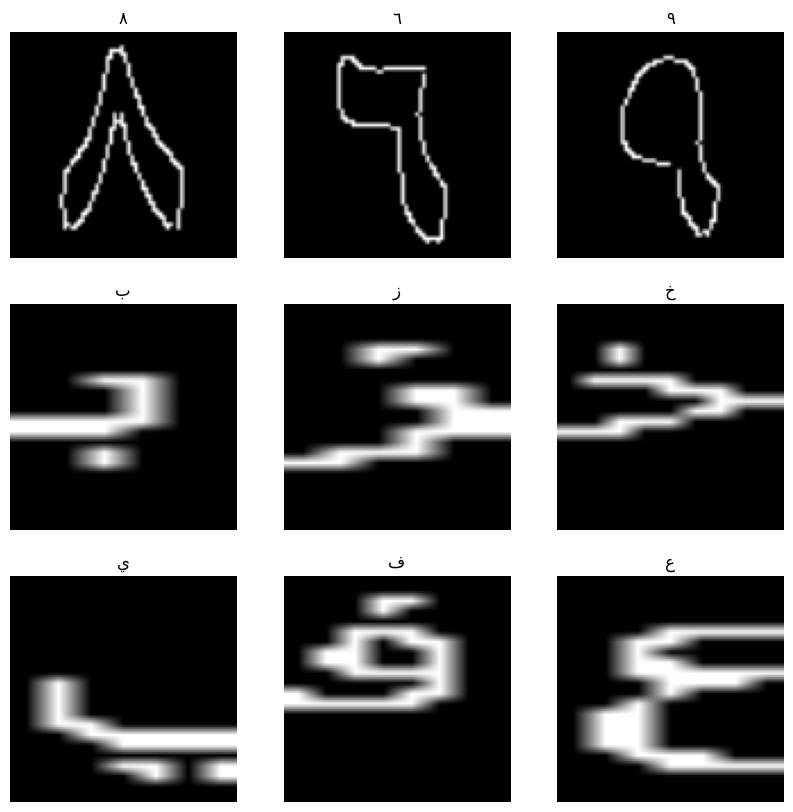

In [8]:
plt.figure(figsize=(10,10))
for i,v in enumerate(np.random.randint(0,len(data),9)):
    plt.subplot(3,3,i+1)
    plt.imshow(data[v],cmap="gray")
    plt.title(getname(data_y[v]))
    plt.axis('off')


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, random_state=42)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [11]:
print(len(X_train) , len(X_test),len(X_val))

58049 19350 19350


In [12]:
X_train[1].shape

(100, 100)

In [13]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_val=np.array(X_val)
y_val=np.array(y_val)

In [14]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [15]:
model=keras.models.Sequential(
[
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)),
    keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
#     #Dropout(.3),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    #number of labels
    keras.layers.Dense( 39,activation='softmax')
])

2023-12-25 11:42:07.621981: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 11:42:07.622074: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 11:42:07.622098: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 11:42:07.911865: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 11:42:07.911928: I external/local_xla/xla/stream_executor

In [16]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 150)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                                        

In [18]:
# model1 with earlystoping, trying to stop before accuracy is delcined sharply
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
model.fit(X_train,y_train,epochs=20,batch_size=64,verbose=1,validation_data =(X_val,y_val) ,callbacks=es)

Epoch 1/20


2023-12-25 11:42:09.622463: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-25 11:42:09.827973: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-25 11:42:11.313515: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:306] gpu_async_0 cuMemAllocAsync failed to allocate 1879042816 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 690434868/4294443008
2023-12-25 11:42:11.313564: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:311] Stats: Limit:                      1852257076
InUse:                      1808951868
MaxInUse:                   3281215564
NumAllocs:                         197
MaxAllocSize:               1472263696
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-12-

907/908 [============================>.] - ETA: 2s - loss: 0.3516 - accuracy: 0.9024

2023-12-25 12:22:24.238749: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:306] gpu_async_0 cuMemAllocAsync failed to allocate 4031425216 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 1588015924/4294443008
2023-12-25 12:22:24.238836: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:311] Stats: Limit:                      1852257076
InUse:                       643179928
MaxInUse:                   4967328328
NumAllocs:                      106799
MaxAllocSize:               2037097216
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-12-25 12:22:24.238850: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:63] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-12-25 12:22:24.238853: E external/local_xla/xla/stream_executor

908/908 [==============================] - 2455s 3s/step - loss: 0.3516 - accuracy: 0.9024 - val_loss: 0.1458 - val_accuracy: 0.9553
Epoch 2/20
908/908 [==============================] - 271s 299ms/step - loss: 0.0619 - accuracy: 0.9826 - val_loss: 0.1070 - val_accuracy: 0.9747
Epoch 3/20
908/908 [==============================] - 271s 299ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0378 - val_accuracy: 0.9904
Epoch 4/20
908/908 [==============================] - 271s 299ms/step - loss: 0.0406 - accuracy: 0.9882 - val_loss: 0.0419 - val_accuracy: 0.9901
Epoch 5/20
908/908 [==============================] - 274s 302ms/step - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.0459 - val_accuracy: 0.9906
Epoch 6/20
908/908 [==============================] - 272s 299ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0357 - val_accuracy: 0.9914
Epoch 7/20
908/908 [==============================] - 271s 299ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0378 - val_accuracy

In [50]:
tf.keras.models.save_model(model, 'last_model.h5')


/tmp/ipykernel_521/3328704745.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, 'last_model.h5')


In [51]:
from tensorflow.keras.models import load_model
model=load_model('./last_model.h5') # load model

In [52]:
X_test[2:4]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [53]:
y_probs=model.predict(X_test)
y_pred=y_probs.argmax(axis=1)
y_percent=np.amax(y_probs,axis=1)

605/605 [==============================] - 30s 49ms/step


In [54]:
loss,accuracy=model.evaluate(X_val,y_val)
print(f'loss= {loss}')
print(f'accuracy= {accuracy}')

605/605 [==============================] - 31s 51ms/step - loss: 0.0300 - accuracy: 0.9944
loss= 0.029958955943584442
accuracy= 0.9944186210632324


In [55]:
accuracy_e=accuracy_score(y_test,y_pred)
accuracy_e

0.9945219638242894

'لا'

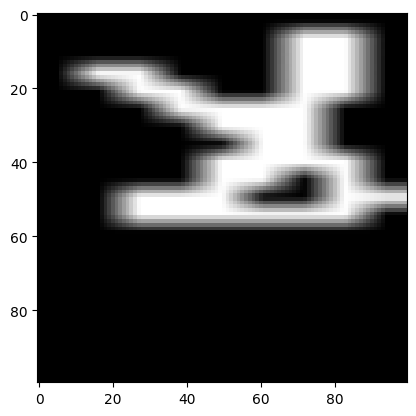

In [56]:
plt.imshow(X_test[10],cmap='gray')
getname(y_pred[10])

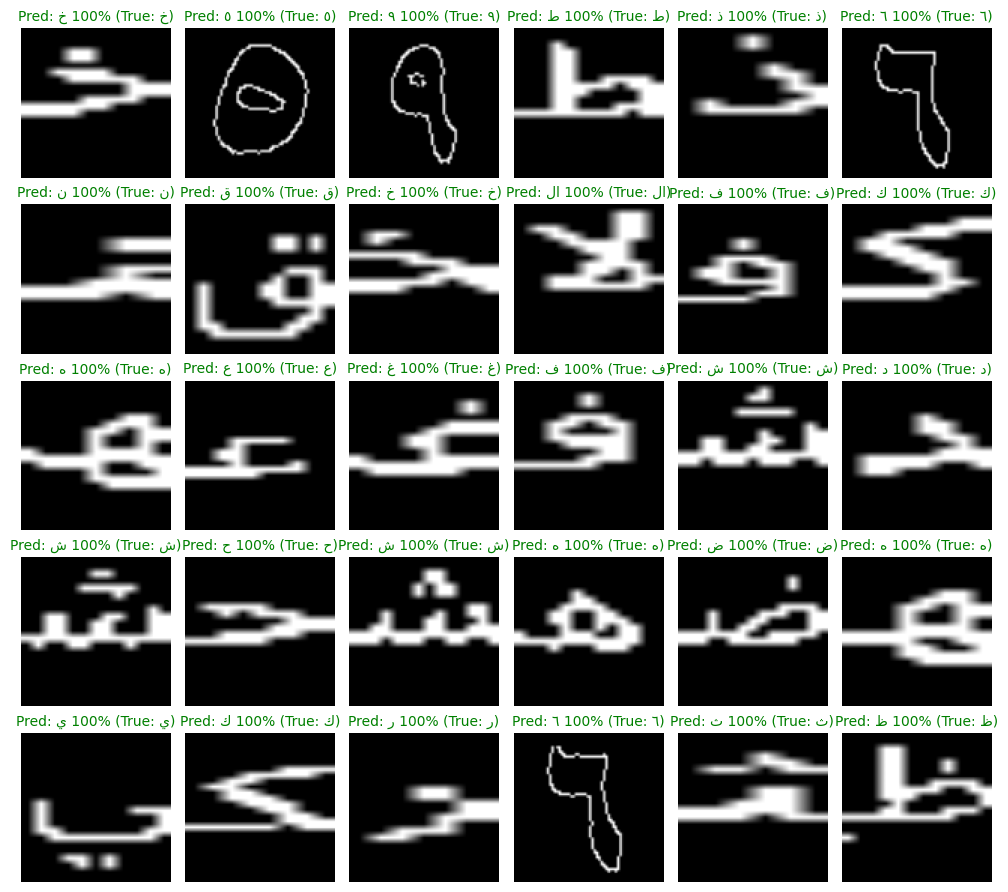

In [57]:
plt.figure(figsize=(10,9))
plotnumber=1

for i in range(1,31):
    if plotnumber <=30:
        ax=plt.subplot(5,6,plotnumber)
        plt.imshow(X_test[i],cmap='gray')
        plt.axis('off')
        plt.title('Pred: ' + getname(y_pred[i]) +' '+ str(round(y_percent[i]*100)) +'% (True: ' + getname(y_test[i]) + ')',fontdict={'fontsize':10 , 'color':('green' if y_pred[i]==y_test[i] else 'red')})
        plotnumber+=1
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 83ms/step


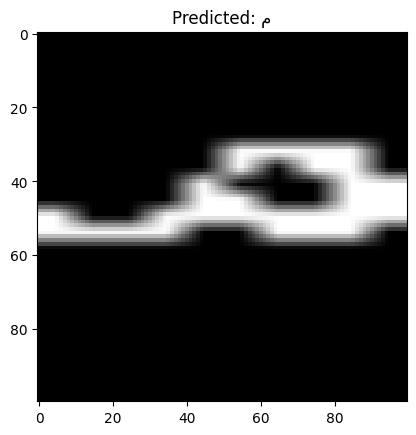

In [58]:
# Load and preprocess the image
img_path = './Dataset/م/1222.png'
img = cv2.imread(img_path, 0)
img = cv2.resize(img, (100, 100))
img = img.reshape(1, 100, 100, 1)  # Add batch and channel dimensions

# Make the prediction
y_probs = model.predict(img)
y_pred = y_probs.argmax(axis=1)

# Assuming you have a function getname() to map the label index to a name
# Replace the following line with your actual function call
predicted_name = getname(y_pred[0])

# Display the image and prediction
plt.imshow(img.reshape(100, 100), cmap='gray')
plt.title(f'Predicted: {predicted_name}')
plt.show()

1/1 [==============================] - 0s 18ms/step


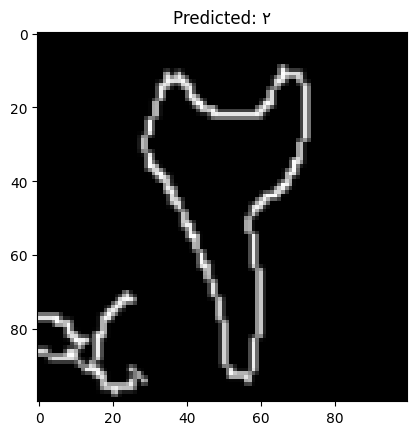

In [59]:
# Load and preprocess the image
img_path = './Dataset/٢/11w.png'
img = cv2.imread(img_path, 0)
img = cv2.resize(img, (100, 100))
img = img.reshape(1, 100, 100, 1)  # Add batch and channel dimensions

# Make the prediction
y_probs = model.predict(img)
y_pred = y_probs.argmax(axis=1)

# Assuming you have a function getname() to map the label index to a name
# Replace the following line with your actual function call
predicted_name = getname(y_pred[0])

# Display the image and prediction
plt.imshow(img.reshape(100, 100), cmap='gray')
plt.title(f'Predicted: {predicted_name}')
plt.show()

Image shape: (22, 11)
1/1 [==============================] - 0s 21ms/step


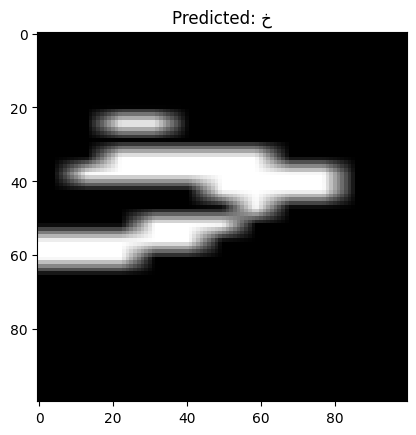

In [62]:
# Load and preprocess the image
img_path = './Dataset/خ/185.png'
img = cv2.imread(img_path, 0)
img_shape = img.shape
img = cv2.resize(img, (100, 100))
img = img.reshape(1, 100, 100, 1)  # Add batch and channel dimensions

print("Image shape:", img_shape)
# Make the prediction
y_probs = model.predict(img)
y_pred = y_probs.argmax(axis=1)

# Assuming you have a function getname() to map the label index to a name
# Replace the following line with your actual function call
predicted_name = getname(y_pred[0])

# Display the image and prediction
plt.imshow(img.reshape(100, 100), cmap='gray')
plt.title(f'Predicted: {predicted_name}')
plt.show()

Image shape: (73, 35)
1/1 [==============================] - 0s 21ms/step


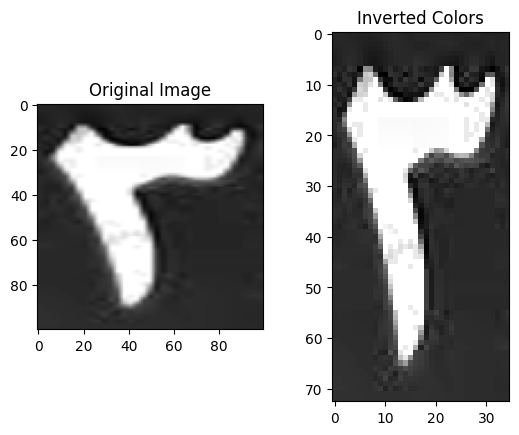

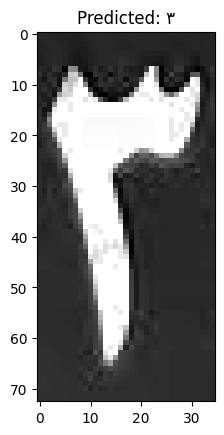

In [67]:
img_path = './plates_img/3.png'
img = cv2.imread(img_path, 0)

# Invert the colors
inverted_img = 255 - img

# Resize the image
img_shape = inverted_img.shape
img = cv2.resize(inverted_img, (100, 100))
img = img.reshape(100, 100)  # Remove singleton dimensions

print("Image shape:", img_shape)

# Make the prediction
y_probs = model.predict(img.reshape(1, 100, 100, 1))
y_pred = y_probs.argmax(axis=1)

# Get the predicted name
predicted_name = getname(y_pred[0])

# Display the original and inverted images along with the prediction
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(inverted_img, cmap='gray')
plt.title('Inverted Colors')

plt.show()

# Display the image and prediction
plt.imshow(inverted_img, cmap='gray')
plt.title(f'Predicted: {predicted_name}')
plt.show()

Image shape: (139, 71)
1/1 [==============================] - 0s 21ms/step


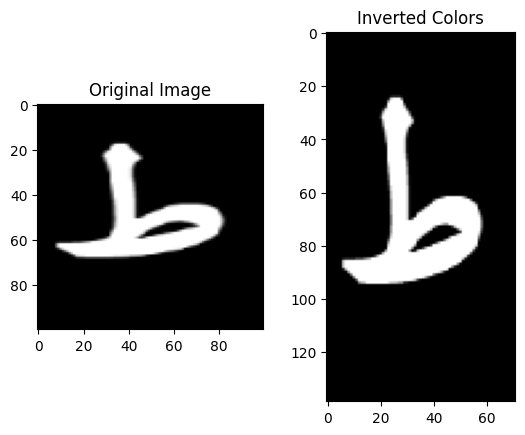

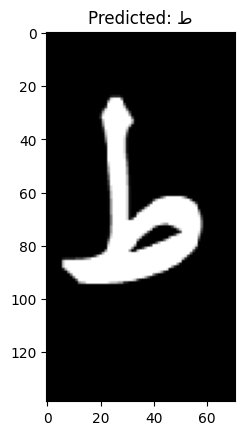

In [68]:
img_path = './plates_img/ط.png'
img = cv2.imread(img_path, 0)

# Invert the colors
inverted_img = 255 - img

# Resize the image
img_shape = inverted_img.shape
img = cv2.resize(inverted_img, (100, 100))
img = img.reshape(100, 100)  # Remove singleton dimensions

print("Image shape:", img_shape)

# Make the prediction
y_probs = model.predict(img.reshape(1, 100, 100, 1))
y_pred = y_probs.argmax(axis=1)

# Get the predicted name
predicted_name = getname(y_pred[0])

# Display the original and inverted images along with the prediction
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(inverted_img, cmap='gray')
plt.title('Inverted Colors')

plt.show()

# Display the image and prediction
plt.imshow(inverted_img, cmap='gray')
plt.title(f'Predicted: {predicted_name}')
plt.show()

Image shape: (77, 42)
1/1 [==============================] - 0s 23ms/step


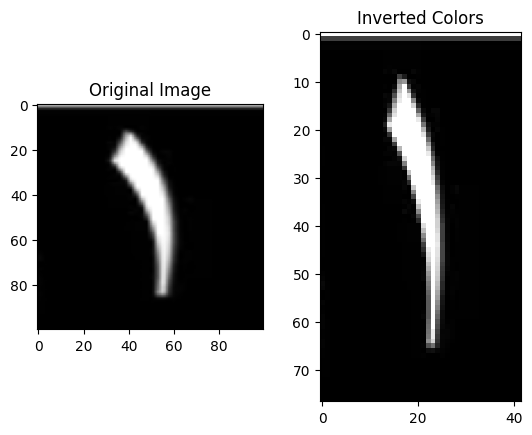

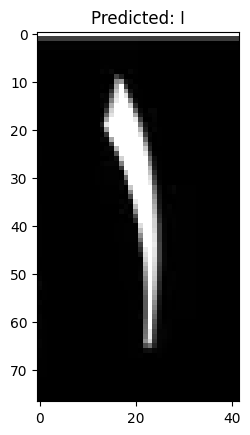

In [73]:
img_path = './plates_img/1.png'
img = cv2.imread(img_path, 0)

# Invert the colors
inverted_img = 255 - img

# Resize the image
img_shape = inverted_img.shape
img = cv2.resize(inverted_img, (100, 100))
img = img.reshape(100, 100)  # Remove singleton dimensions

print("Image shape:", img_shape)

# Make the prediction
y_probs = model.predict(img.reshape(1, 100, 100, 1))
y_pred = y_probs.argmax(axis=1)

# Get the predicted name
predicted_name = getname(y_pred[0])

# Display the original and inverted images along with the prediction
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(inverted_img, cmap='gray')
plt.title('Inverted Colors')

plt.show()

# Display the image and prediction
plt.imshow(inverted_img, cmap='gray')
plt.title(f'Predicted: {predicted_name}')
plt.show()